In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

%matplotlib inline 
sns.set(color_codes=True)

### Import filtered Student's file 

In [2]:
# read in the .csv file - of filtered student_info

data_df = pd.read_csv("C:/Users/sinea/OneDrive/Documents OneDrive/06 - CCT Masters in DA/Capstone - 2023/Capstone_Project_2023/Python workings  notebooks/filtered_df2.csv")

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_student         383 non-null    int64 
 1   gender             383 non-null    int64 
 2   highest_education  383 non-null    object
 3   age_band           383 non-null    object
 4   studied_credits    383 non-null    int64 
 5   final_result       383 non-null    object
 6   tenure             383 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 21.1+ KB


### Encoding categorical data

Using One-Hot Encoding

In [4]:
# One-Hot Encoding for 'highest_education', 'age_band', 'final_result', 'tenure_band'

data_df_encoded = pd.get_dummies(data_df, columns=['highest_education', 'age_band', 'final_result'])


In [5]:
#data_df_encoded.info()

In [6]:
# convert the dtype of the recently one-hot encoded columns to int64 from uint8 dtype

columns_to_convert = [
    'highest_education_A Level or Equivalent',
    'highest_education_HE Qualification',
    'highest_education_Lower Than A Level',
    'highest_education_Post Graduate Qualification',
    'age_band_0-35',
    'age_band_35-55',
    'age_band_55<=',
    'final_result_Distinction',
    'final_result_Fail',
    'final_result_Pass',
    'final_result_Withdrawn', 
]

# Convert the selected columns to int64 dtype
data_df_encoded[columns_to_convert] = data_df_encoded[columns_to_convert].astype('int64')

In [7]:
#data_df_encoded.info()

### Algorithm 3 - Support Vector Machine (SVM) 

#### https://scikit-learn.org/stable/modules/svm.html

In [8]:
# import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [9]:
# divide the dataset into features (X) and the target variable (y)

# variable 1 = gender
X = data_df_encoded.drop(columns=['gender'])  # drop target variable from the dataframe
y = data_df_encoded['gender']        # id target variable 

# variable 2 = studied_credits
X2 = data_df_encoded.drop(columns=['studied_credits'])
y2 = data_df_encoded['studied_credits']

# variable 3 = tenure
X3 = data_df_encoded.drop(columns=['tenure'])
y3 = data_df_encoded['tenure']

In [10]:
# split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=0)

In [11]:
# feature scaling (recommended for SVM)

scaler = StandardScaler()

In [12]:
# scale x dataframes - test and train
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled2 = scaler.fit_transform(X_train2)
X_train_scaled3 = scaler.fit_transform(X_train3)

X_test_scaled = scaler.transform(X_test)
X_test_scaled2 = scaler.transform(X_test2)
X_test_scaled3 = scaler.transform(X_test3)

C:\Users\sinea\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- tenure
Feature names seen at fit time, yet now missing:
- gender

  warnings.warn(message, FutureWarning)
C:\Users\sinea\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- tenure
Feature names seen at fit time, yet now missing:
- studied_credits

  warnings.warn(message, FutureWarning)


In [13]:
# create the SVM model
# kernels to try ... 'linear', 'rbf' (default), 'poly', 'sigmoid', 'callable'/''

#svm_model = SVC(kernel='rbf')  

#### Hyper parameter tuning

In [14]:
# defining the hyperparameter grid to search

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1],      # Kernel coefficient for 'rbf'
    'kernel': ['linear', 'poly', 'rbf']  # Different kernels to explore
}

### Fit and tune with model for variable 1 = gender

Hyperparm tuning completed with GridSearch CV


In [15]:
# create the GridSearchCV model with SVM

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)


In [16]:
# train the GridSearchCV model on the scaled training data

grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']})

In [17]:
# find the best hyperparameters from the search

best_params = grid_search.best_params_

In [18]:
# train the SVM model with the best hyperparameters on the entire training data

best_svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])

In [19]:
# fit the SVM model to the scaled data

best_svm_model.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.001)

In [20]:
# make predictions on the scaled test data

#y_pred = svm_model.predict(X_test_scaled)

y_pred = best_svm_model.predict(X_test_scaled)

In [21]:
# calculate the accuracy of the model

#accuracy = accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5714285714285714


In [22]:
# calculate the accuracy of the best model

print("Best Model Accuracy:", accuracy)
print("Best Hyperparameters:", best_params)

Best Model Accuracy: 0.5714285714285714
Best Hyperparameters: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


#### Plotting the GridSearchCV

In [23]:
# get the results of the hyperparameter search .. only for attempt 2 

results = grid_search.cv_results_


In [24]:
# attempt 2 of Gridsearch CV with param_grid
# Reshape the mean_test_score array for each kernel separately

mean_test_scores = {}

for kernel in param_grid['kernel']:
    mean_test_scores[kernel] = results['mean_test_score'][results['param_kernel'] == kernel].reshape(len(param_grid['C']), len(param_grid['gamma']))

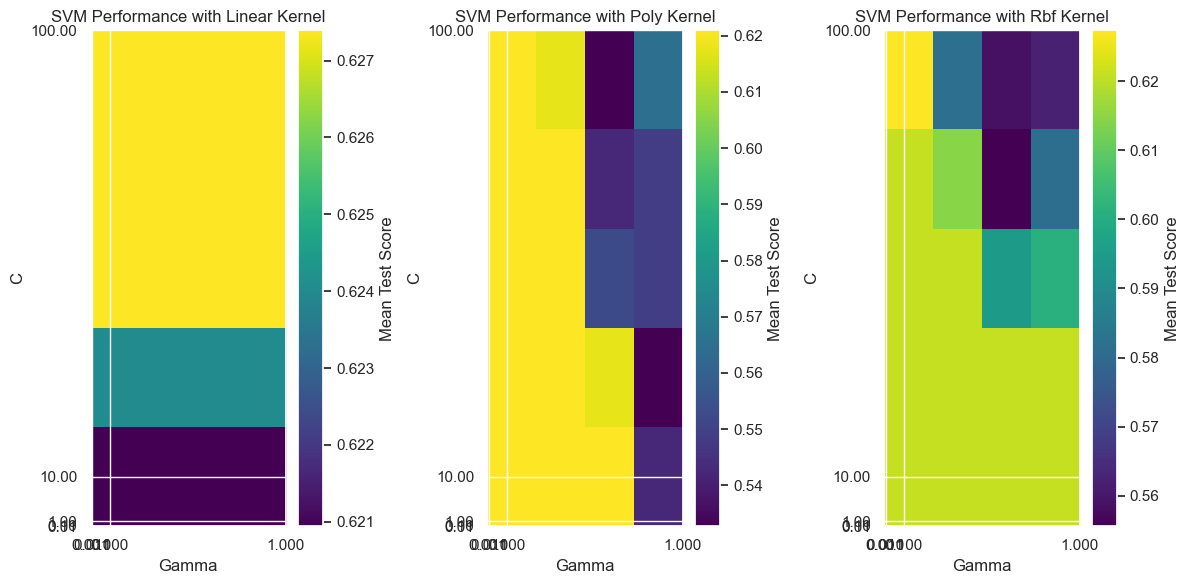

In [25]:
# Create a heatmap plot for v2 of GridSearch CV to visualize the performance with different hyperparameters

plt.figure(figsize=(12, 6))

for i, kernel in enumerate(param_grid['kernel']):
    plt.subplot(1, 3, i + 1)
    plt.imshow(mean_test_scores[kernel], cmap='viridis', origin='lower', aspect='auto',
               extent=[np.min(param_grid['gamma']), np.max(param_grid['gamma']),
                       np.min(param_grid['C']), np.max(param_grid['C'])])
    plt.colorbar(label='Mean Test Score')
    plt.xlabel('Gamma')
    plt.ylabel('C')
    plt.xticks(param_grid['gamma'])
    plt.yticks(param_grid['C'])
    plt.title(f'SVM Performance with {kernel.capitalize()} Kernel')

plt.tight_layout()
plt.show()

### Fit and tune with model for variable 2 = studied_credit

Hyperparm tuning completed with GridSearch CV


In [26]:
# create the GridSearchCV model with SVM

grid_search2 = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)


In [27]:
# train the GridSearchCV model on the scaled training data

grid_search2.fit(X_train_scaled2, y_train2)


C:\Users\sinea\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']})

In [28]:
# find the best hyperparameters from the search

best_params2 = grid_search2.best_params_

In [29]:
# train the SVM model with the best hyperparameters on the entire training data

best_svm_model2 = SVC(kernel='rbf', C=best_params2['C'], gamma=best_params['gamma'])

In [30]:
# fit the SVM model to the scaled data

best_svm_model2.fit(X_train_scaled2, y_train2)

SVC(C=0.01, gamma=0.001)

In [31]:
# make predictions on the scaled test data

y_pred2 = best_svm_model2.predict(X_test_scaled2)

In [32]:
# calculate the accuracy of the model

accuracy2 = accuracy_score(y_test2, y_pred2)

print("Accuracy:", accuracy2)

Accuracy: 0.7012987012987013


In [33]:
# calculate the accuracy of the best model

print("Best Model Accuracy:", accuracy2)
print("Best Hyperparameters:", best_params2)

Best Model Accuracy: 0.7012987012987013
Best Hyperparameters: {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}


### Fit and tune with model for variable 3 = tenure

Hyperparm tuning completed with GridSearch CV


In [34]:
# create the GridSearchCV model with SVM

grid_search3 = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)


In [35]:
# train the GridSearchCV model on the scaled training data

grid_search3.fit(X_train_scaled3, y_train3)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']})

In [36]:
# find the best hyperparameters from the search

best_params3 = grid_search3.best_params_

In [37]:
# train the SVM model with the best hyperparameters on the entire training data

best_svm_model3 = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])

In [38]:
# fit the SVM model to the scaled data

best_svm_model3.fit(X_train_scaled3, y_train3)

SVC(C=1, gamma=0.001)

In [39]:
# make predictions on the scaled test data

y_pred3 = best_svm_model3.predict(X_test_scaled3)

In [40]:
# calculate the accuracy of the model

accuracy3 = accuracy_score(y_test3, y_pred3)

print("Accuracy:", accuracy3)

Accuracy: 0.09090909090909091


In [41]:
# calculate the accuracy of the best model

print("Best Model Accuracy:", accuracy3)
print("Best Hyperparameters:", best_params3)

Best Model Accuracy: 0.09090909090909091
Best Hyperparameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
